<a href="https://colab.research.google.com/github/gabrielvaz081/ProjetoIA/blob/main/ProjetoIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Informação da(s) Variável(is): Compacidade Relativa - % compactação do material Área da Superfície - m² Área da Parede - m² Área do Telhado - m² Altura Total - m Orientação - 2:Norte, 3:Leste, 4:Sul, 5:Oeste Área de Envidraçamento - 0%, 10%, 25%, 40% (da área útil) Distribuição da área envidraçada (variação) - 1:Uniforme, 2:Norte, 3:Leste, 4:Sul, 5:Oeste Carga de aquecimento - kWh/m² Carga de resfriamento - kWh/m²

https://www.kaggle.com/datasets/winternguyen/energy-efficiency-on-buildings

In [4]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv('/content/Building Energy Efficiency.csv')

In [6]:
df.columns

Index(['Relative Compactness', 'Surface Area', 'Wall Area', 'Roof Area',
       'Overall Height', 'Orientation', 'Glazing Area',
       'Glazing Area Distribution', 'Heating Load', 'Cooling Load'],
      dtype='object')

In [7]:
df.head()

Relative Compactness  Surface Area  Wall Area  Roof Area  Overall Height  \
0                0.7638         514.5      294.0     110.25             7.0   
1                0.9800         514.5      294.0     110.25             7.0   
2                0.9800         514.5      294.0     110.25             7.0   
3                0.9800         514.5      294.0     110.25             7.0   
4                0.9000         563.5      318.5     122.50             7.0   

   Orientation  Glazing Area  Glazing Area Distribution  Heating Load  \
0            2           0.0                          0         15.55   
1            3           0.0                          0         15.55   
2            4           0.0                          0         15.55   
3            5           0.0                          0         15.55   
4            2           0.0                          0         20.84   

   Cooling Load  
0         21.33  
1         21.33  
2         21.33  
3         21.33  
4         28.28

In [8]:
df = df.rename(columns={'Relative Compactness':'Compacidade_Relativa','Surface Area':'Area_Superficie','Wall Area':'Area_Parede','Roof Area':'Area_Telhado','Overall Height':'Altura_Total','Orientation':'Orientacao','Glazing Area':'Area_Envidracada','Glazing Area Distribution':'Distribuicao_Area_Envidracada','Heating Load':'Carga_Aquecimento','Cooling Load':'Carga_Resfriamento'})

In [9]:
df.head()

Compacidade_Relativa  Area_Superficie  Area_Parede  Area_Telhado  \
0                0.7638            514.5        294.0        110.25   
1                0.9800            514.5        294.0        110.25   
2                0.9800            514.5        294.0        110.25   
3                0.9800            514.5        294.0        110.25   
4                0.9000            563.5        318.5        122.50   

   Altura_Total  Orientacao  Area_Envidracada  Distribuicao_Area_Envidracada  \
0           7.0           2               0.0                              0   
1           7.0           3               0.0                              0   
2           7.0           4               0.0                              0   
3           7.0           5               0.0                              0   
4           7.0           2               0.0                              0   

   Carga_Aquecimento  Carga_Resfriamento  
0              15.55               21.33  
1              15.55               21.33  
2              15.55               21.33  
3              15.55               21.33  
4              20.84               28.28

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Compacidade_Relativa           768 non-null    float64
 1   Area_Superficie                768 non-null    float64
 2   Area_Parede                    768 non-null    float64
 3   Area_Telhado                   768 non-null    float64
 4   Altura_Total                   768 non-null    float64
 5   Orientacao                     768 non-null    int64  
 6   Area_Envidracada               768 non-null    float64
 7   Distribuicao_Area_Envidracada  768 non-null    int64  
 8   Carga_Aquecimento              768 non-null    float64
 9   Carga_Resfriamento             768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [11]:
descricao_aquecimento = df['Carga_Aquecimento'].describe()
descricao_aquecimento

count    768.000000
mean      22.307201
std       10.090196
min        6.010000
25%       12.992500
50%       18.950000
75%       31.667500
max       43.100000
Name: Carga_Aquecimento, dtype: float64

In [12]:
menor_media = df[df['Carga_Aquecimento'] < 22.3].count()
maior_media = df[df['Carga_Aquecimento'] > 22.3].count()
print(menor_media)
print(maior_media)

Compacidade_Relativa             400
Area_Superficie                  400
Area_Parede                      400
Area_Telhado                     400
Altura_Total                     400
Orientacao                       400
Area_Envidracada                 400
Distribuicao_Area_Envidracada    400
Carga_Aquecimento                400
Carga_Resfriamento               400
dtype: int64
Compacidade_Relativa             368
Area_Superficie                  368
Area_Parede                      368
Area_Telhado                     368
Altura_Total                     368
Orientacao                       368
Area_Envidracada                 368
Distribuicao_Area_Envidracada    368
Carga_Aquecimento                368
Carga_Resfriamento               368
dtype: int64


In [13]:
descricao_resfriamento = df['Carga_Resfriamento'].describe()
descricao_resfriamento


count    768.000000
mean      24.587760
std        9.513306
min       10.900000
25%       15.620000
50%       22.080000
75%       33.132500
max       48.030000
Name: Carga_Resfriamento, dtype: float64

In [14]:
menor_media = df[df['Carga_Resfriamento'] < 24.6].count()
maior_media = df[df['Carga_Resfriamento'] > 24.6].count()
print(menor_media)
print(maior_media)

Compacidade_Relativa             393
Area_Superficie                  393
Area_Parede                      393
Area_Telhado                     393
Altura_Total                     393
Orientacao                       393
Area_Envidracada                 393
Distribuicao_Area_Envidracada    393
Carga_Aquecimento                393
Carga_Resfriamento               393
dtype: int64
Compacidade_Relativa             375
Area_Superficie                  375
Area_Parede                      375
Area_Telhado                     375
Altura_Total                     375
Orientacao                       375
Area_Envidracada                 375
Distribuicao_Area_Envidracada    375
Carga_Aquecimento                375
Carga_Resfriamento               375
dtype: int64


In [15]:
!pip install pandas_profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 353.0/353.0 kB 36.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 12.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 61.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 31.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.4/455.4 kB 45.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 106.0 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=46d7b411a18e8f3d63929acf3332f50ff3d69b5cccc25213e69f271488211c25
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: wordcloud
    Found existing installation: wordcloud 1.8.2.2
    Uninstalling word

In [16]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df)
profile

<ipython-input-16-f7fc72962d65>:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

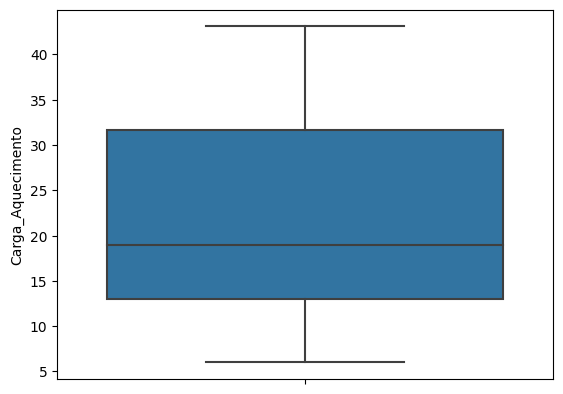

In [20]:
sns.boxplot(y='Carga_Aquecimento', data=df)
plt.show()

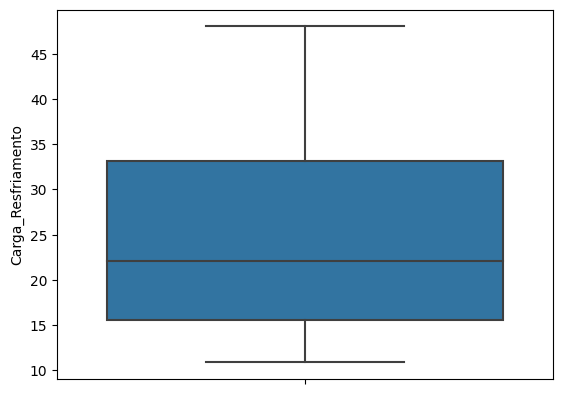

In [21]:
sns.boxplot(y='Carga_Resfriamento', data=df)
plt.show()

In [23]:
!pip install human-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.4/116.4 kB 10.3 MB/s eta 0:00:00


In [24]:
from hulearn.classification import FunctionClassifier

In [28]:
def classe_aquecimento(x):
  eficiencia = (x / 22.3) * 100

  if eficiencia <= 25:
    return "A+"
  elif eficiencia <= 50:
    return "A"
  elif eficiencia <= 75:
    return "B"
  elif eficiencia <= 100:
    return "B-"
  elif eficiencia <= 150:
    return "C"
  elif eficiencia <= 200:
    return "D"
  elif eficiencia <= 250:
    return "E"
  else:
    return "F"

def create_rule(data: pd.DataFrame):
    return data['Carga_Aquecimento'].apply(classe_aquecimento).values

df['Classe_Aquecimento'] = create_rule(df)

In [30]:
def classe_resfriamento(x):
  eficiencia = (x / 24.6) * 100

  if eficiencia <= 25:
    return "A+"
  elif eficiencia <= 50:
    return "A"
  elif eficiencia <= 75:
    return "B"
  elif eficiencia <= 100:
    return "B-"
  elif eficiencia <= 150:
    return "C"
  elif eficiencia <= 200:
    return "D"
  elif eficiencia <= 250:
    return "E"
  else:
    return "F"

def create_rule(data: pd.DataFrame):
    return data['Carga_Resfriamento'].apply(classe_resfriamento).values

df['Classe_Resfriamento'] = create_rule(df)

In [31]:
df.head()

Compacidade_Relativa  Area_Superficie  Area_Parede  Area_Telhado  \
0                0.7638            514.5        294.0        110.25   
1                0.9800            514.5        294.0        110.25   
2                0.9800            514.5        294.0        110.25   
3                0.9800            514.5        294.0        110.25   
4                0.9000            563.5        318.5        122.50   

   Altura_Total  Orientacao  Area_Envidracada  Distribuicao_Area_Envidracada  \
0           7.0           2               0.0                              0   
1           7.0           3               0.0                              0   
2           7.0           4               0.0                              0   
3           7.0           5               0.0                              0   
4           7.0           2               0.0                              0   

   Carga_Aquecimento  Carga_Resfriamento Classe_Aquecimento  \
0              15.55               21.33                  B   
1              15.55               21.33                  B   
2              15.55               21.33                  B   
3              15.55               21.33                  B   
4              20.84               28.28                 B-   

  Classe_Resfriamento  
0                  B-  
1                  B-  
2                  B-  
3                  B-  
4                   C

In [58]:
x_values = df[['Compacidade_Relativa','Area_Superficie','Area_Parede','Area_Telhado','Altura_Total','Orientacao','Area_Envidracada','Distribuicao_Area_Envidracada']].values
y_values = df['Classe_Aquecimento'].values
quantidade = df['Classe_Aquecimento'].groupby(df['Classe_Aquecimento']).count()
print(quantidade)

print("Amostra de padrões de entrada:")
print(x_values)

print("Amostra de saídas:")
print(y_values)

Classe_Aquecimento
A      71
B     271
B-     58
C     247
D     121
Name: Classe_Aquecimento, dtype: int64
Amostra de padrões de entrada:
[[7.638e-01 5.145e+02 2.940e+02 ... 2.000e+00 0.000e+00 0.000e+00]
 [9.800e-01 5.145e+02 2.940e+02 ... 3.000e+00 0.000e+00 0.000e+00]
 [9.800e-01 5.145e+02 2.940e+02 ... 4.000e+00 0.000e+00 0.000e+00]
 ...
 [6.200e-01 8.085e+02 3.675e+02 ... 3.000e+00 4.000e-01 5.000e+00]
 [6.200e-01 8.085e+02 3.675e+02 ... 4.000e+00 4.000e-01 5.000e+00]
 [6.200e-01 8.085e+02 3.675e+02 ... 5.000e+00 4.000e-01 5.000e+00]]
Amostra de saídas:
['B' 'B' 'B' 'B' 'B-' 'B-' 'B-' 'B-' 'B-' 'B-' 'B-' 'B-' 'B-' 'B-' 'B-'
 'B' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A'
 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'C' 'C' 'C'
 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'D' 'D' 'D' 'D' 'C'
 'C' 'C' 'C' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'B' 'B' 'B' 'B'
 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' '

In [45]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_values, y_values, test_size=0.3, random_state=0)

print("Tamanho total da base de dados = ",len(x_values))
print("Tamanho do conjunto de treinamento = ",len(x_train))
print("Tamanho do conjunto de testes = ",len(x_test))

Tamanho total da base de dados =  768
Tamanho do conjunto de treinamento =  537
Tamanho do conjunto de testes =  231


#Avaliação Perceptron

In [46]:
from sklearn.linear_model import Perceptron

perceptron = Perceptron(random_state = 0)
perceptron.fit(x_train, y_train)

Perceptron()

Métricas Treino

In [47]:
from sklearn.metrics import accuracy_score,confusion_matrix

y_predicted = perceptron.predict(x_train)
accuracy = accuracy_score(y_train,y_predicted)
conf_matrix = confusion_matrix(y_train,y_predicted)

print("Métricas de Treinamento")
print("Acurácia = ",accuracy)
print("\nMatriz de Confusão")
print(conf_matrix)

Métricas de Treinamento
Acurácia =  0.659217877094972

Matriz de Confusão
[[  0  49   0   0   0]
 [  0 183   0   3   0]
 [  0  38   0   8   0]
 [  0   0   0 171   0]
 [  0   0   0  85   0]]


Métricas Testes

In [48]:
from sklearn.metrics import accuracy_score,confusion_matrix

y_predicted = perceptron.predict(x_test)
accuracy = accuracy_score(y_test,y_predicted)
conf_matrix = confusion_matrix(y_test,y_predicted)

print("Métricas de Testes")
print("Acurácia = ",accuracy)
print("\nMatriz de Confusão")
print(conf_matrix)

Métricas de Testes
Acurácia =  0.6883116883116883

Matriz de Confusão
[[ 0 22  0  0  0]
 [ 0 83  0  2  0]
 [ 0  9  0  3  0]
 [ 0  0  0 76  0]
 [ 0  0  0 36  0]]


#Avaliação KNN

In [59]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

Métricas Treino

In [60]:
y_predicted = knn.predict(x_train)
accuracy = accuracy_score(y_train,y_predicted)
conf_matrix = confusion_matrix(y_train,y_predicted)

print("Métricas de Treinamento")
print("Acurácia = ",accuracy)
print("\nMatriz de Confusão")
print(conf_matrix)

Métricas de Treinamento
Acurácia =  0.8845437616387337

Matriz de Confusão
[[ 28  21   0   0   0]
 [  0 173  10   3   0]
 [  0   6  38   2   0]
 [  0   0   0 160  11]
 [  0   0   0   9  76]]


Métricas Testes

In [61]:
y_predicted = knn.predict(x_test)
accuracy = accuracy_score(y_test,y_predicted)
conf_matrix = confusion_matrix(y_test,y_predicted)

print("Métricas de Testes")
print("Acurácia = ",accuracy)
print("\nMatriz de Confusão")
print(conf_matrix)

Métricas de Testes
Acurácia =  0.8571428571428571

Matriz de Confusão
[[12 10  0  0  0]
 [ 2 77  4  2  0]
 [ 0  4  7  1  0]
 [ 0  0  0 68  8]
 [ 0  0  0  2 34]]


#Regressão Logística

In [62]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Métricas Treino

In [65]:
y_predicted = clf.predict(x_train)
accuracy = accuracy_score(y_train,y_predicted)
conf_matrix = confusion_matrix(y_train,y_predicted)
print("Métricas de Treinamento")
print("Acurácia = ",accuracy)
print("\nMatriz de Confusão")
print(conf_matrix)

Métricas de Treinamento
Acurácia =  0.6871508379888268

Matriz de Confusão
[[ 13  33   3   0   0]
 [ 10 165   8   3   0]
 [  0  34   4   7   1]
 [  0   0   0 155  16]
 [  0   0   0  53  32]]


Métricas Testes

In [66]:
y_predicted = clf.predict(x_test)
accuracy = accuracy_score(y_test,y_predicted)
conf_matrix = confusion_matrix(y_test,y_predicted)
print("Métricas de Testes")
print("Acurácia = ",accuracy)
print("\nMatriz de Confusão")
print(conf_matrix)

Métricas de Testes
Acurácia =  0.6666666666666666

Matriz de Confusão
[[ 8 12  2  0  0]
 [10 68  5  2  0]
 [ 0  8  1  3  0]
 [ 0  0  0 66 10]
 [ 0  0  0 25 11]]


#Avaliação Árvore de Decisão

In [67]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=0).fit(x_train, y_train)

Métricas Treino

In [68]:
y_predicted = tree.predict(x_train)
accuracy = accuracy_score(y_train,y_predicted)
conf_matrix = confusion_matrix(y_train,y_predicted)
print("Métricas de Treinamento")
print("Acurácia = ",accuracy)
print("\nMatriz de Confusão")
print(conf_matrix)

Métricas de Treinamento
Acurácia =  1.0

Matriz de Confusão
[[ 49   0   0   0   0]
 [  0 186   0   0   0]
 [  0   0  46   0   0]
 [  0   0   0 171   0]
 [  0   0   0   0  85]]


Métricas Testes

In [69]:
y_predicted = tree.predict(x_test)
accuracy = accuracy_score(y_test,y_predicted)
conf_matrix = confusion_matrix(y_test,y_predicted)
print("Métricas de Testes")
print("Acurácia = ",accuracy)
print("\nMatriz de Confusão")
print(conf_matrix)

Métricas de Testes
Acurácia =  0.9653679653679653

Matriz de Confusão
[[22  0  0  0  0]
 [ 2 81  2  0  0]
 [ 0  1 11  0  0]
 [ 0  0  0 73  3]
 [ 0  0  0  0 36]]


#Avaliação Bayesiana

In [70]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train, y_train)

GaussianNB()

Métricas Treino

In [71]:
y_predicted = model.predict(x_train)
accuracy = accuracy_score(y_train,y_predicted)
conf_matrix = confusion_matrix(y_train,y_predicted)
print("Métricas de Treinamento")
print("Acurácia = ",accuracy)
print("\nMatriz de Confusão")
print(conf_matrix)

Métricas de Treinamento
Acurácia =  0.6145251396648045

Matriz de Confusão
[[ 49   0   0   0   0]
 [110  73   0   3   0]
 [ 15  23   0   8   0]
 [  0   0   0 140  31]
 [  0   0   0  17  68]]


Métricas Testes

In [72]:
y_predicted = model.predict(x_test)
accuracy = accuracy_score(y_test,y_predicted)
conf_matrix = confusion_matrix(y_test,y_predicted)
print("Métricas de Testes")
print("Acurácia = ",accuracy)
print("\nMatriz de Confusão")
print(conf_matrix)

Métricas de Testes
Acurácia =  0.6363636363636364

Matriz de Confusão
[[22  0  0  0  0]
 [53 30  0  2  0]
 [ 1  8  0  3  0]
 [ 0  0  0 63 13]
 [ 0  0  0  4 32]]
